<h1 style="color: #e3db24;">00 | Libraries and Settings</h1>

In [ ]:
# 📚 Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #e3db24;">01 | Data Extraction</h1>

In [9]:
data = pd.read_csv('/king_ country_ houses_aa.csv')

<h2 style="color: #ec7511;">Exploring the Data (First Impression)</h2>

In [10]:
data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [11]:
data.shape

(21613, 21)

First Impressions

*   This dataset comprises one-year data (from May 2014 to May 2015) of house sale prices. It features 21 different columns and 21,613 rows (=houses).

*  There is an id column and a date column. 'date' column maybe must be cleanning regarding the format.

*   Apart from that, there is numerical (continuous) data, i.e. regarding size, and also categorical data (all coded in discrete numbers)





Documentation - Column Legend

*   id: A unique identifier for a house.
*   Édate: The date on which the house was sold.
*   price: The sale price of the house (prediction target).
*   bedrooms: Number of bedrooms in the house.
*   bathrooms: Number of bathrooms in the house, per bedroom.
*   sqft_living: Square footage of the interior living space.
*   sqft_lot: Square footage of the land space.
*   floors: Number of floors (levels) in the house.
*   waterfront: Whether the house has a waterfront view.

view: Number of times the house has been viewed.
condition: The overall condition of the house.
grade: The overall grade given to the house, based on the King County grading system.
sqft_above: Square footage of the house apart from the basement.
sqft_basement: Square footage of the basement.
yr_built: The year the house was built.
yr_renovated: The year the house was renovated.
zipcode: ZIP code area.
sqft_living15: The interior living space for the nearest 15 neighbors in 2015.
sqft_lot15: The land spaces for the nearest 15 neighbors in 2015.


**TARGET --> Price**

What features most significantly impact the house price.
Additionally, we aim to explore properties valued at $650K and above for more detailed insights.

<h1 style="color: #e3db24;">02 | Data Cleaning</h1>

In [13]:
boston_houses = data.copy() #copy data

<h2 style="color: #ec7511;">Feature Selection (Dropping unnecessary features)</h2>

In [16]:
boston_houses.set_index('id', inplace=True)    #Changing the index

In [24]:
boston_houses.columns=[col.lower().replace(" ","_") for col in boston_houses.columns]

In [17]:
boston_houses.isnull().sum() #Checking Null Values

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [18]:
boston_houses.duplicated().sum() #Checking Duplicates

0

In [19]:
boston_houses.eq(" ").sum() #Checking Duplicates

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [20]:
boston_houses.dtypes #data types

,0
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


In [21]:
# our target is "price" let's moving it to the right
boston_houses = boston_houses[[col for col in boston_houses.columns if col != 'price'] + ['price']]

In [25]:
boston_houses.head(2)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0


<h1 style="color: #e3db24;">03 | EDA (Exploratory Data Analysis)</h1>

<h2 style="color: #ec7511;">Statistical information about the numerical columns</h2>

In [26]:
round(boston_houses.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
bedrooms,21613.0,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.0,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.0,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.0,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.0,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.0,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.0,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.0,3.41,0.65,1.00,3.00,3.00,4.00,5.00
grade,21613.0,7.66,1.18,1.00,7.00,7.00,8.00,13.00
sqft_above,21613.0,1788.39,828.09,290.00,1190.00,1560.00,2210.00,9410.00


Regarding our target; the medium house price is 540088- in Boston and the medium square footage of interior living space is 2079.

The minimum price is 75000- and the maximum is 7700000-






+ Measures of central tendency - Mean, median, mode
+ Measures of spread / dispersion - SD, var, range, quartiles, percentiles
+ Meaures of frequency - Frequency

+ **Range:** defines the difference between the highest and lowest values.
+ **Variance**: measures how far each number in the set is from the mean and thus from every other number in the set.
+ **Standard deviation:** The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance
+ **Quartiles:** A quartile is a statistical term that describes a division of observations into four defined intervals based on the values of the data and how they compare to the entire set of observations.
+ **Percentiles:** same but divided in 100 groups.

<h2 style="color: #ec7511;">Selecting numerical</h2>

In [27]:
num = boston_houses.select_dtypes("number")
num.shape

(21613, 19)

<h2 style="color: #ec7511;">Checking Distributions</h2>

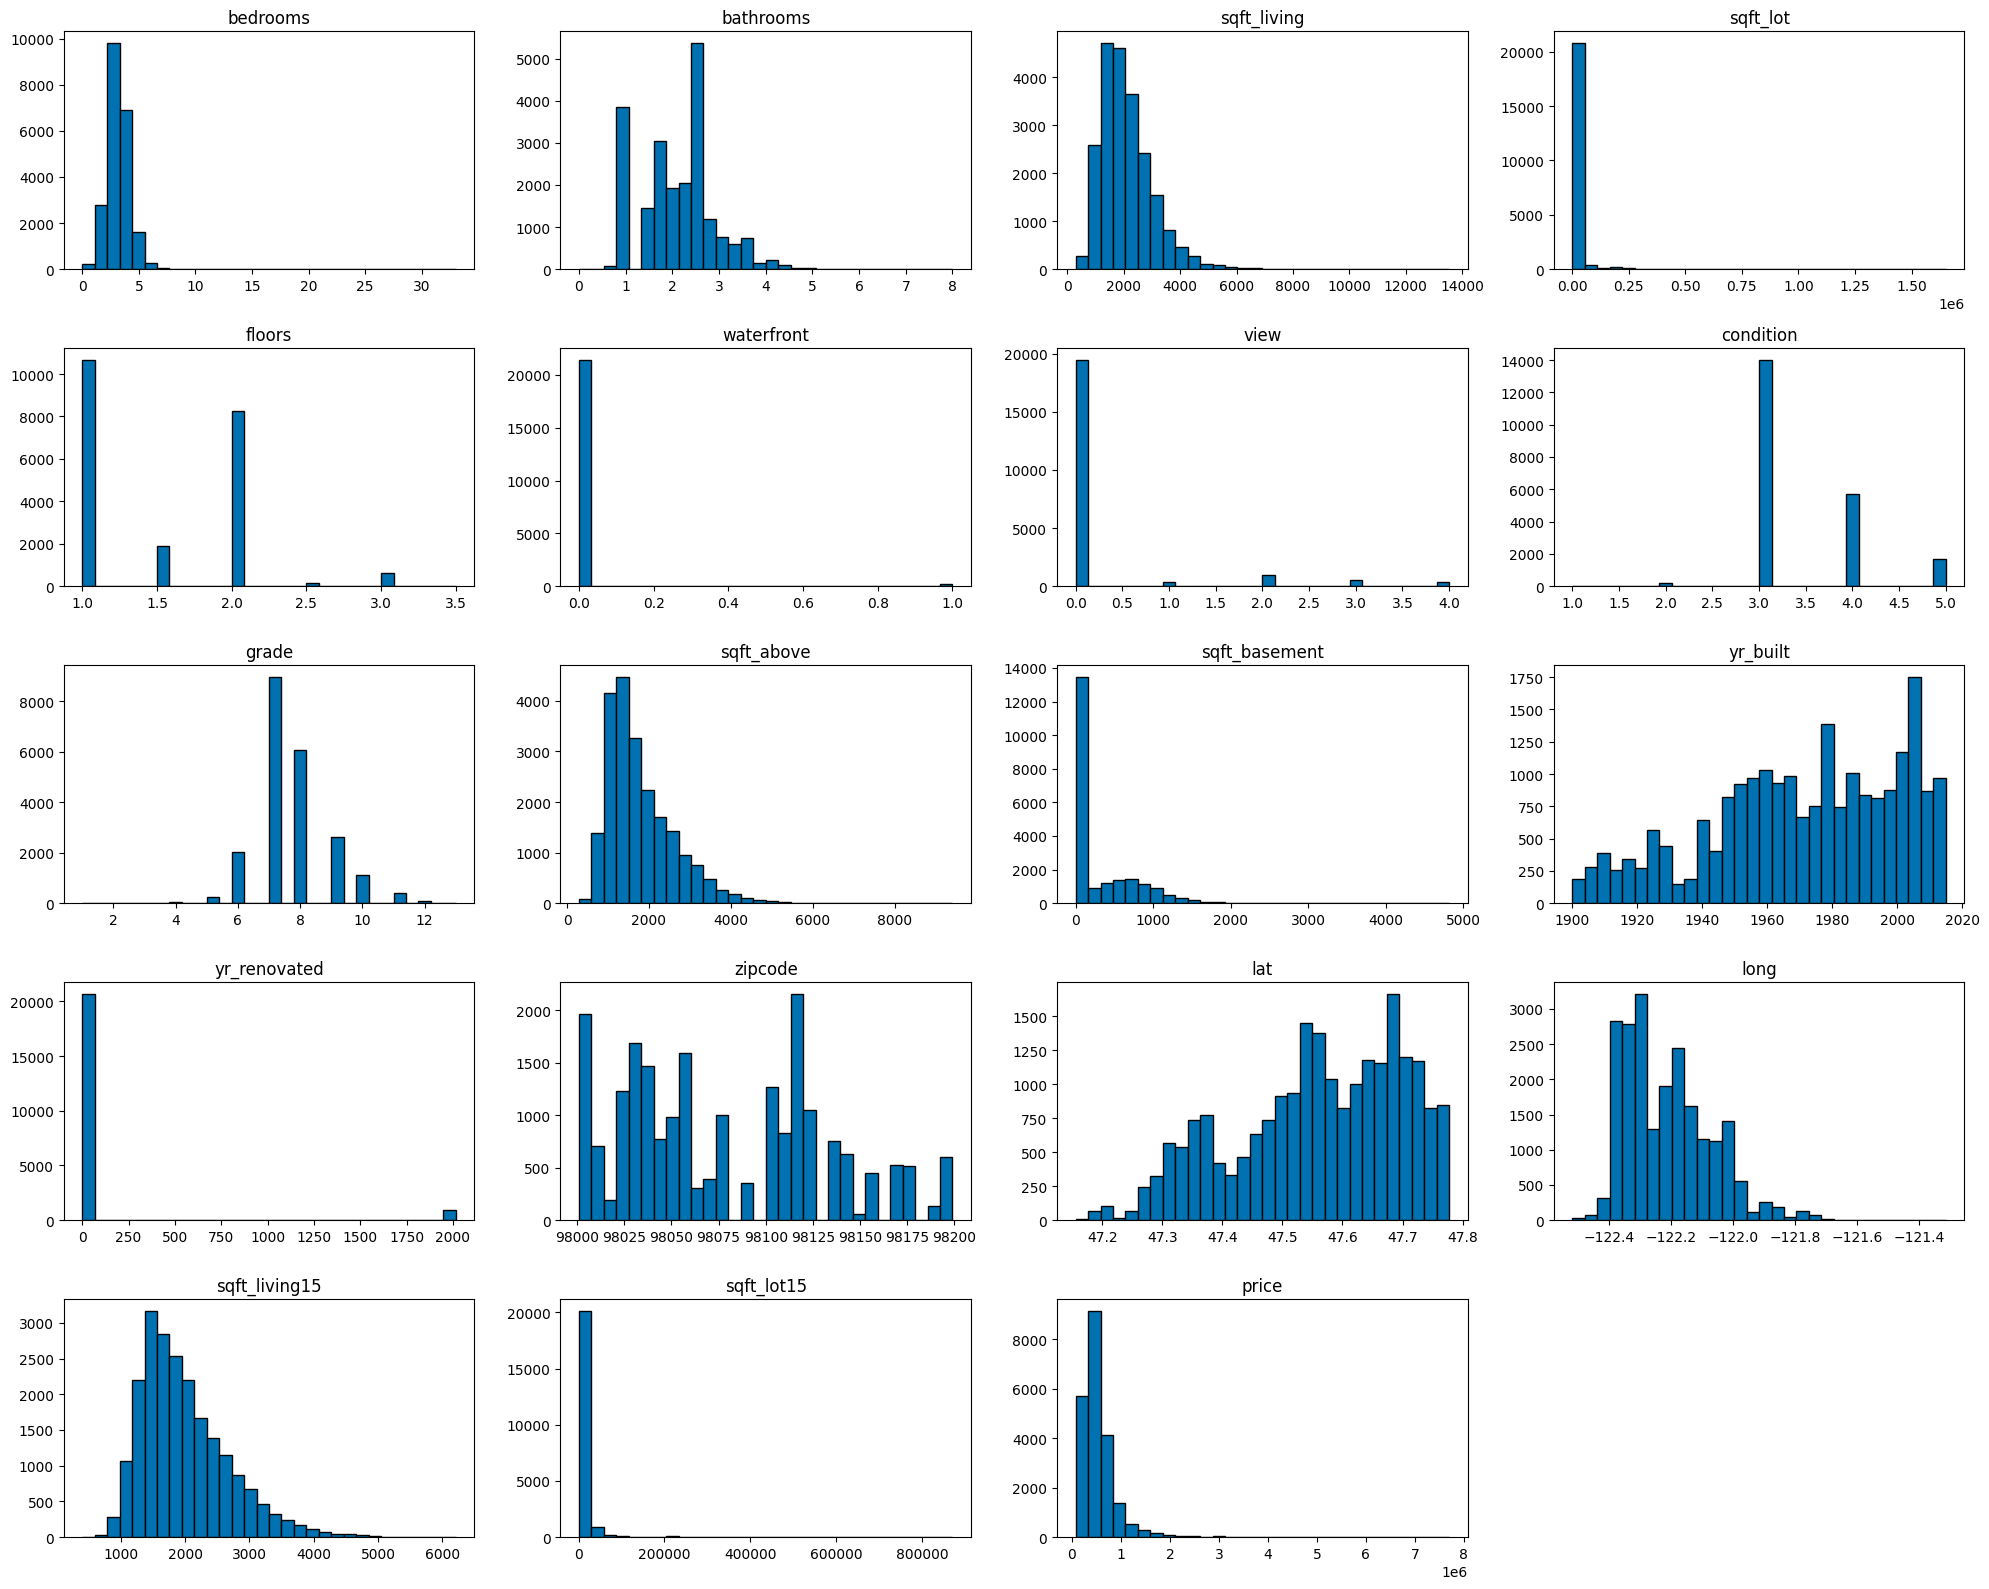

In [28]:
# histogram for all numberical columns

color = '#0072B2'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

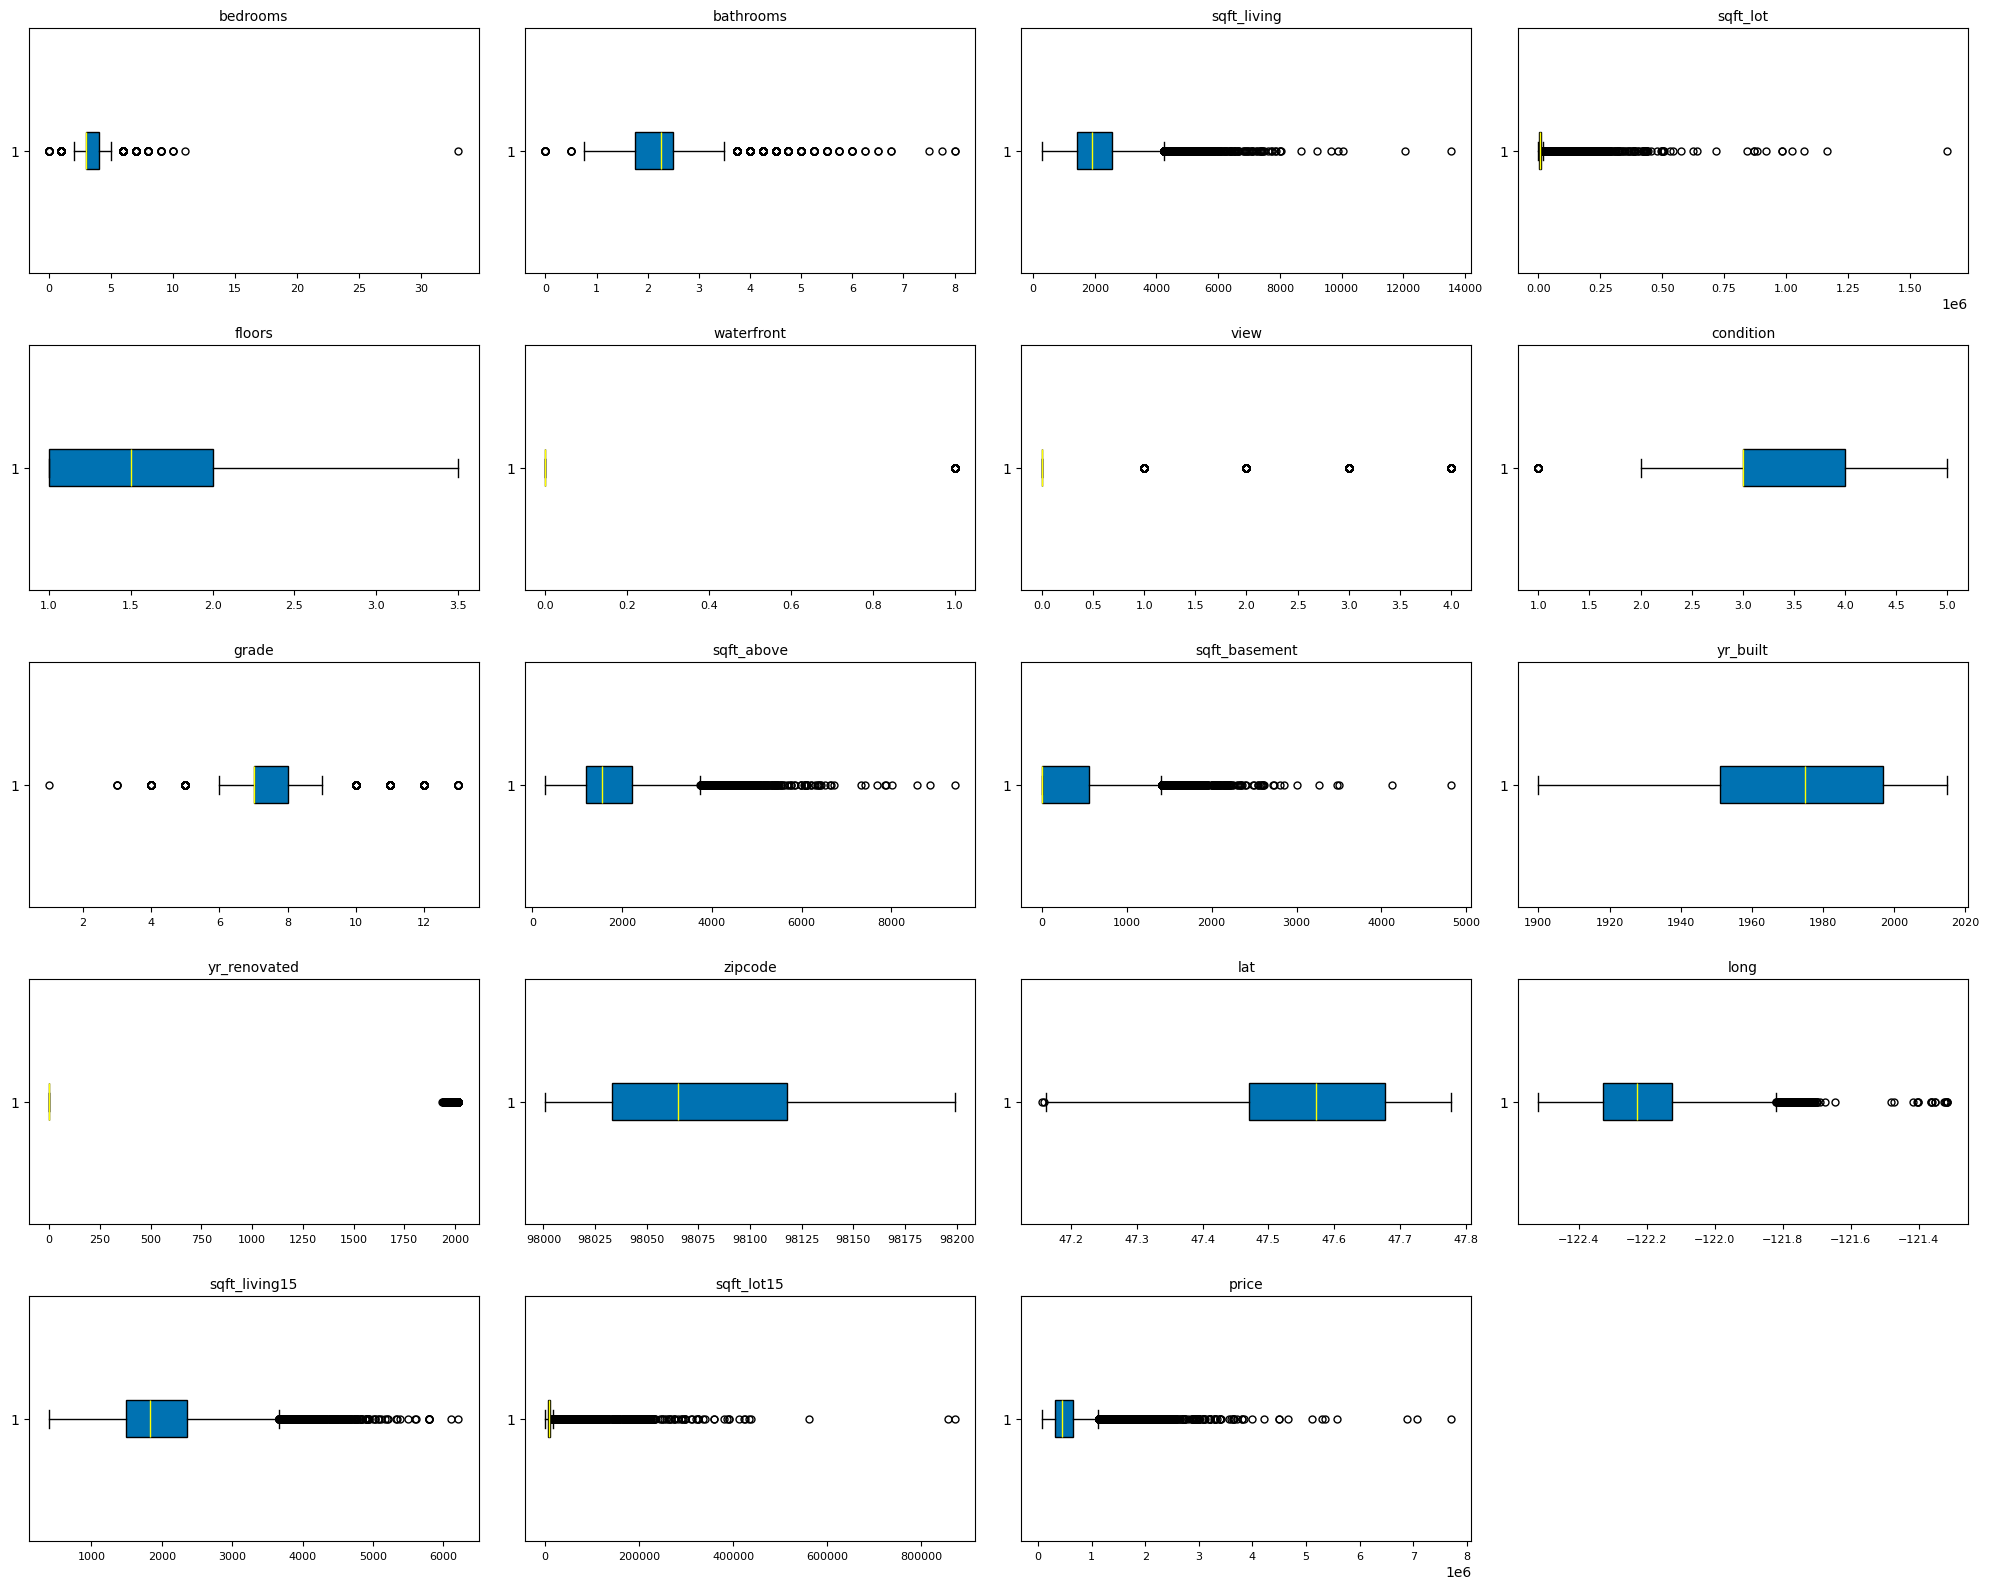

In [29]:
# boxplots for all num columns

color = '#0072B2'

# grid size
nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

<h3 style="color: #ec1139;">Conclusions on Categorical Data</h3>

***Impressions from the Diagramms***

potential categorical variables

floors               
waterfront           
view                
condition            
grade              
bedrooms        

Many outliers in our target

In [33]:
cat = boston_houses.select_dtypes(exclude="number")
num = boston_houses.select_dtypes("number")

# Being specific
cat_from_num = num.loc[:, num.nunique() <10] # how does loc work Vs iloc
cat = pd.concat([cat, cat_from_num], axis=1)

num = num.drop(columns=cat_from_num.columns)

In [34]:
num.shape

(21613, 15)

In [38]:
num.corrwith(boston_houses['price']).sort_values(ascending=False) #Looking for Correlations


,0
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003
yr_renovated,0.126434


<h2 style="color: #ec7511;">Feature Selection</h2>

Grounds on which to delete columns:

- Checking null values to drop a column
- Sense check to drop columns that are not significant
- Using heat maps to check multicollinearity for numerical variables
- Chi-square tests for categorical variables



<h3 style="color: #ec7511;">Separating Categorical Data</h3>

In [ ]:
# potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]

<h2 style="color: #ec7511;">Looking for Correlations</h2>

In [ ]:
num_corr = round(num.corr(), 2)

<div class="alert alert-block alert-warning">
Checking for <b>multicollinearity</b>
    
- We don't want multicollinearity, we are checking here
- We do want: High correlations (+ or -) with the target!</div>

In [ ]:
# Correlation Matrix-Heatmap Plot which shows only half of numbers (so no doubles)
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

### Exercise 4: How to interpret this correlation matrix? Which other correlation methods we know?

### Specific Correlations with the Target

### Perform 3 Plots and Explain the Findings from the Data

### Contigency Tables, Chi-Square...

<h1 style="color: #e3db24;">04 | Data Processing</h1>

<h2 style="color: #ec7511;">X-Y Split</h2>

<h2 style="color: #ec7511;">Normalizing the Data</h2>

<h1 style="color: #e3db24;">05 | Modeling</h1>

<h2 style="color: #ec7511;">Train-Test Split</h2>

<h2 style="color: #ec7511;">Model Validation</h2>

regression metrics erklären, scale von RMSE and MAE (?) same as data

- erklären, warum wir welches Regressionsmodell genutzt haben (linear, lasso, decision trees, KNN, Ridge, XGBoost ...)
- kaggle und github "house prices" suchen und andere Notebooks angucken
- am Ende: grid search hilft bei erster Sache: welche metrics sind die besten?

<h1 style="color: #e3db24;">06 | Improving the Model</h1>

<h1 style="color: #e3db24;">07 | Reporting</h1>